In [101]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [102]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.1.2
0.16.2


In [103]:
train_data = datasets.FashionMNIST(root="data",
                                  train = True,
                                  download=True,
                                  transform=torchvision.transforms.ToTensor(),
                                  target_transform=None)

test_data=datasets.FashionMNIST(root="data",
                               train=False,
                               download=True,
                               transform=ToTensor(),
                               target_transform=None)

In [104]:
len(train_data),len(test_data)

(60000, 10000)

In [105]:
image,label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [106]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [107]:
class_to_idx = train_data.class_to_idx
class_to_idx


{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [108]:
image.shape,label

(torch.Size([1, 28, 28]), 9)

Text(0.5, 1.0, '9')

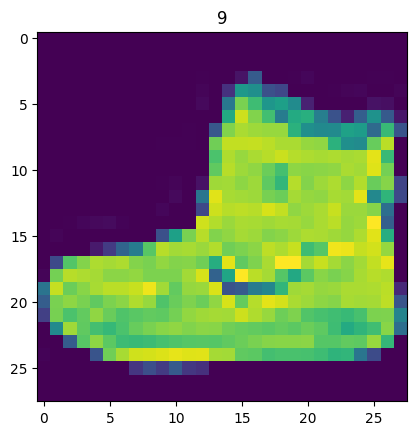

In [109]:
image.lable = train_data[0]
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

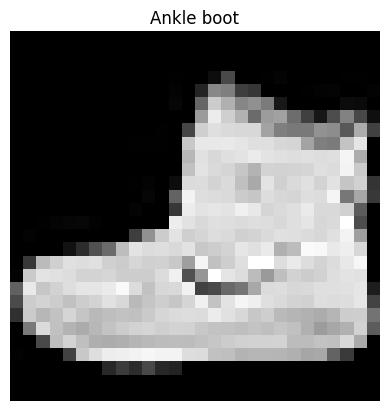

In [110]:
plt.imshow(image.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.axis(False)

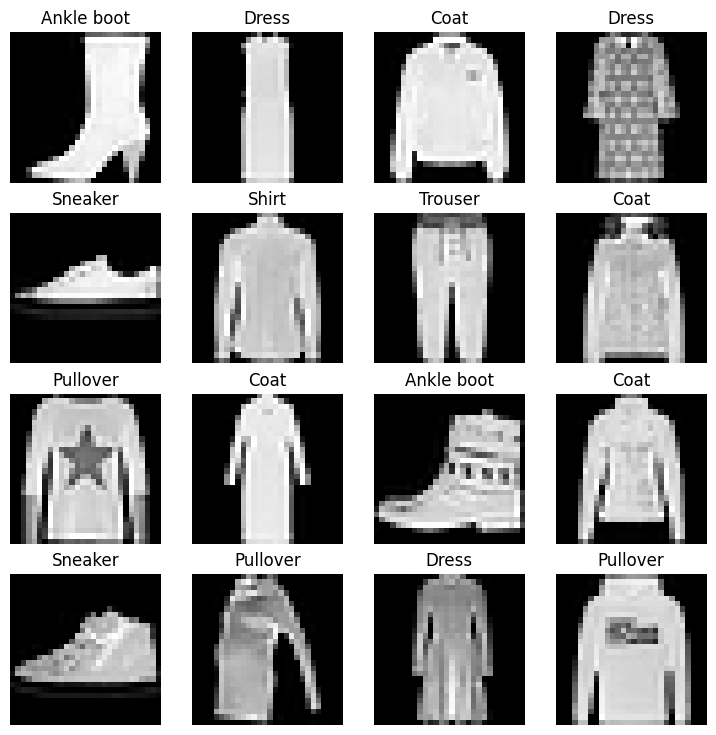

In [111]:
# torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
    random_idx = torch.randint(0,len(train_data),size=[1]).item()
    image,label = train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(image.squeeze(),cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

In [112]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [113]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset = train_data,batch_size=BATCH_SIZE,shuffle=True)

test_dataloader = DataLoader(dataset=test_data,batch_size=BATCH_SIZE,shuffle=False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7aba606c54b0>,
 <torch.utils.data.dataloader.DataLoader at 0x7aba6021be50>)

In [114]:
print(f"Dataloaders: {train_dataloader,test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7aba606c54b0>, <torch.utils.data.dataloader.DataLoader object at 0x7aba6021be50>)
Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [115]:
train_features_batch,train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size:torch.Size([1, 28, 28])
Label: 9,label size:torch.Size([])


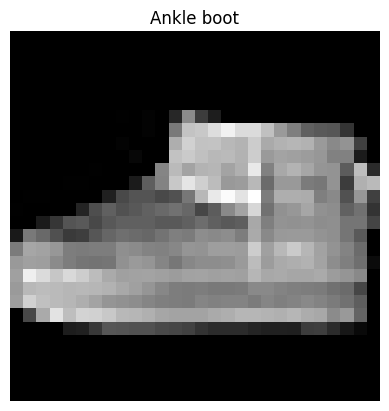

In [116]:
# torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
img,label = train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size:{img.shape}")
print(f"Label: {label},label size:{label.shape}")


In [117]:
flatten_model = nn.Flatten()

x = train_features_batch[0]
output = flatten_model(x)
print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening : {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening : torch.Size([1, 784])


In [118]:
output

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0157, 0.0000, 0.0000,
         0.0000, 0.2471, 0.4667, 0.1725, 0.0000, 0.0000, 0.0000, 0.3882, 0.3216,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0000, 0.0000, 0.0000, 0.1059,
         0.3059, 0.4745, 0.5137, 0.5882, 0.7137, 0.7137, 0.9569, 0.7216, 0.4667,
         0.3804, 0.4667, 0.3804, 0.0549, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0000, 0.0824, 0.3725,
         0.5137, 0.4314, 0.3647, 0.3137, 0.3490, 0.2745, 0.4000, 0.5333, 0.3216,
         0.1490, 0.2824, 0.3137, 0.3882, 0.3804, 0.4078, 0.1647, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5882,
         0.4078, 0.2392, 0.2667, 0.2235, 0.3333, 0.3490, 0.3333, 0.2745, 0.0667,
         0.2824, 0.3333, 0.3059, 0.2745, 0.2549, 0.2157, 0.2824, 0.3725, 0.0667,
         0.0000, 0.0000, 0.0

In [119]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
    def __init__(self,input_shape,hidden_units,output_shape):
        super().__init__()
        self.layer_stack = nn.Sequential(nn.Flatten(),
                                        nn.Linear(in_features=input_shape,out_features=hidden_units),
                                        nn.Linear(in_features=hidden_units,out_features=output_shape))
        
    def forward(self,x):
        return self.layer_stack(x)

In [120]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(input_shape=784,
                             hidden_units=10,
                              output_shape = len(class_names)).to("cpu")
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [121]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [122]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [123]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [124]:
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    
    return acc

In [125]:
from timeit import default_timer as timer

def print_train_time(start: float,end: float,device: torch.device=None):
    
    total_time = end-start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [126]:
start_time = timer()
end_time = timer()
print_train_time(start = start_time,end = end_time,device="cpu")

Train time on cpu: 0.000 seconds


2.7737999971577665e-05

In [127]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")
    
    train_loss = 0
    for batch,(X,y) in enumerate(train_dataloader):
        model_0.train()
        y_pred = model_0(X)
        
        loss = loss_fn(y_pred,y)
        train_loss+=loss
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        if batch%400==0:
            print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples.")
        
    train_loss /= len(train_dataloader)
    
    test_loss,test_acc = 0,0
    model_0.eval()
    with torch.inference_mode():
        for X_test,y_test in test_dataloader:
            
            test_pred = model_0(X_test)
            
            test_loss+=loss_fn(test_pred,y_test)
            
            test_acc+=accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))
            
        test_loss/=len(test_dataloader)
        
        test_acc/=len(test_dataloader)
        
    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc:{test_acc:.4f}%")

train_time_end_on_cpu = timer()

total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))
    
    

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5904 | Test loss: 0.5095, Test acc:82.0387%
Epoch: 1
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4763 | Test loss: 0.4799, Test acc:83.1969%
Epoch: 2
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4550 | Test loss: 0.4766, Test acc:83.4265%
Train time on cpu: 26.633 seconds


In [128]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn):
    
    loss,acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            y_pred = model(X)
            
            loss+=loss_fn(y_pred,y)
            acc += accuracy_fn(y_true=y,
                              y_pred=y_pred.argmax(dim=1))
            
        loss/=len(data_loader)
        acc/=len(data_loader)
        
        
    return {"model_name":model.__class__.__name__,
           "model_loss":loss.item(),
           "model_acc":acc}

model_0_results = eval_model(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [129]:
torch.cuda.is_available()

True

In [130]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [131]:
class FashionMNISTV1(nn.Module):
    def __init__(self,input_shape:int,
                hidden_units:int,
                output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(nn.Flatten(),
                                        nn.Linear(in_features=input_shape,
                                                 out_features=hidden_units),
                                        nn.ReLU(),
                                        nn.Linear(in_features=hidden_units,
                                                 out_features=output_shape),
                                        nn.ReLU())
        
        
    def forward(self,x: torch.Tensor):
        return self.layer_stack(x)    

In [132]:
torch.manual_seed(42)
model1 = FashionMNISTV1(input_shape=784,
                       hidden_units=10,
                       output_shape=len(class_names)).to(device)
model1

FashionMNISTV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [133]:
next(model1.parameters()).to(device)

Parameter containing:
tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
        [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
        ...,
        [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
        [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
        [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
       device='cuda:0', requires_grad=True)

In [134]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model1.parameters(),lr=0.1)

In [135]:
def train_step(model:nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              optimizer:torch.optim.Optimizer,
              accuracy_fn,
              device:torch.device = device):
    train_loss,train_acc=0,0
    model.train()

    train_loss = 0
    for batch,(X,y) in enumerate(data_loader):
        X,y = X.to(device),y.to(device)
        
        y_pred = model(X)
        
        loss = loss_fn(y_pred,y)
        train_loss+=loss
        train_acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        
    train_loss /= len(data_loader)
    train_acc/=len(data_loader)
    print(f"Train loss:{train_loss:.5f} | Train acc:{train_acc:.2f}%")

In [136]:
def test_step(model:torch.nn.Module,
             data_loader:torch.utils.data.DataLoader,
             loss_fn:torch.nn.Module,
             accuracy_fn,
             device:torch.device=device):
    
    test_loss,test_acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            X,y = X.to(device),y.to(device)
            
            test_pred = model(X)
            
            test_loss+=loss_fn(test_pred,y)
            
            test_acc+=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
            
        test_loss/=len(data_loader)
        
        test_acc/=len(data_loader)
        
        print(f"Test loss:{test_loss:.5f} | Test acc:{test_acc:.2f}% \n")


In [137]:
torch.manual_seed(42)
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epoch  = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch:{epoch}\n------")
    
    train_step(model=model1,
              data_loader=train_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn = accuracy_fn,
              device=device)
    
    test_step(model=model1,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)
train_time_end_on_gpu = timer()

total_train_time_model1 = print_train_time(start=train_time_start_on_gpu,
                                          end=train_time_end_on_gpu,
                                          device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
------
Train loss:1.09199 | Train acc:61.34%
Test loss:0.95636 | Test acc:65.00% 

Epoch:1
------
Train loss:0.78101 | Train acc:71.93%
Test loss:0.72227 | Test acc:73.91% 

Epoch:2
------
Train loss:0.67027 | Train acc:75.94%
Test loss:0.68500 | Test acc:75.02% 

Train time on cuda: 28.650 seconds


In [138]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [139]:
total_train_time_model_0

26.632599789000324

In [140]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn):
    
    loss,acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            X,y = X.to(device),y.to(device)
            y_pred = model(X)
            
            loss+=loss_fn(y_pred,y)
            acc += accuracy_fn(y_true=y,
                              y_pred=y_pred.argmax(dim=1))
            
        loss/=len(data_loader)
        acc/=len(data_loader)
        
        
    return {"model_name":model.__class__.__name__,
           "model_loss":loss.item(),
           "model_acc":acc}

In [141]:
model1_results = eval_model(model=model1,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [142]:
model1_results

{'model_name': 'FashionMNISTV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [143]:
class FashionMNISTV2(nn.Module):
    def __init__(self,input_shape:int,
                 hidden_units:int,
                 output_shape:int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(nn.Conv2d(in_channels=input_shape,
                                                   out_channels=hidden_units,
                                                   kernel_size=3,
                                                   stride=1,
                                                   padding=1),
                                        nn.ReLU(),
                                        nn.Conv2d(in_channels=hidden_units,
                                                 out_channels=hidden_units,
                                                 kernel_size=3,
                                                 stride=1,
                                                 padding=1),
                                        nn.ReLU(),
                                        nn.MaxPool2d(kernel_size=2))
        self.conv_block_2 = nn.Sequential(nn.Conv2d(in_channels=hidden_units,
                                                   out_channels=hidden_units,
                                                   kernel_size=3,
                                                   stride=1,
                                                   padding=1),
                                         nn.ReLU(),
                                         nn.Conv2d(in_channels=hidden_units,
                                                  out_channels=hidden_units,
                                                  kernel_size=3,
                                                  stride=1,
                                                  padding=1),
                                          nn.ReLU(),
                                         nn.MaxPool2d(kernel_size=2)
                                         )
        self.classifier = nn.Sequential(nn.Flatten(),
                                       nn.Linear(in_features=hidden_units*7*7,
                                                out_features = output_shape)
                                       )
        
    def forward(self,x):
        x = self.conv_block_1(x)
#         print(x.shape)
        x = self.conv_block_2(x)
#         print(x.shape)
        x = self.classifier(x)
        return x

In [144]:
len(class_names)

10

In [145]:
torch.manual_seed(42)
model_2 = FashionMNISTV2(input_shape=1,
                        hidden_units=10,
                        output_shape=len(class_names)).to(device)


In [146]:
torch.manual_seed(42)

images = torch.randn(size=(32,3,64,64))

test_image = images[0]
print(f"Image batch shape: {images.shape}")
print(f"single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [147]:
conv_layer = nn.Conv2d(in_channels=3,
                      out_channels=10,
                      kernel_size=(3,3),
                      stride=1,
                      padding=1)

conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 64, 64])

In [148]:
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

max_pool_layer = nn.MaxPool2d(kernel_size=2)

test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer and max_pool layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 64, 64])
Shape after going through conv_layer and max_pool layer(): torch.Size([1, 10, 32, 32])


In [149]:
torch.manual_seed(42)
random_tensor = torch.randn(size=(1,1,2,2))
print(f"\nRandom tensor:\n{random_tensor}")
print(f"Random tensor shape:{random_tensor.shape}")
max_pool_layer = nn.MaxPool2d(kernel_size=2)
max_pool_tensor = max_pool_layer(random_tensor)

print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")
random_tensor


Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape:torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

In [150]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.1)

In [151]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_2 = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n")
    train_step(model=model_2,
              data_loader=train_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device=device)
    test_step(model=model_2,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)
    
train_time_end_model_2=timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0

Train loss:0.60137 | Train acc:78.14%
Test loss:0.38624 | Test acc:86.06% 

Epoch: 1

Train loss:0.35881 | Train acc:86.91%
Test loss:0.35069 | Test acc:86.99% 

Epoch: 2

Train loss:0.32103 | Train acc:88.38%
Test loss:0.33857 | Test acc:87.70% 

Train time on cuda: 35.201 seconds


In [154]:
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn
                            )
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTV2',
 'model_loss': 0.33856630325317383,
 'model_acc': 87.69968051118211}

In [156]:
compare_results = pd.DataFrame([model_0_results,
                               model1_results,
                               model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTV1,0.685001,75.019968
2,FashionMNISTV2,0.338566,87.699681


In [158]:
compare_results["training_time"] = [total_train_time_model_0,
                                   total_train_time_model1,
                                   total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,26.632600
1,FashionMNISTV1,0.685001,75.019968,28.649957
2,FashionMNISTV2,0.338566,87.699681,35.201180


Text(0, 0.5, 'model')

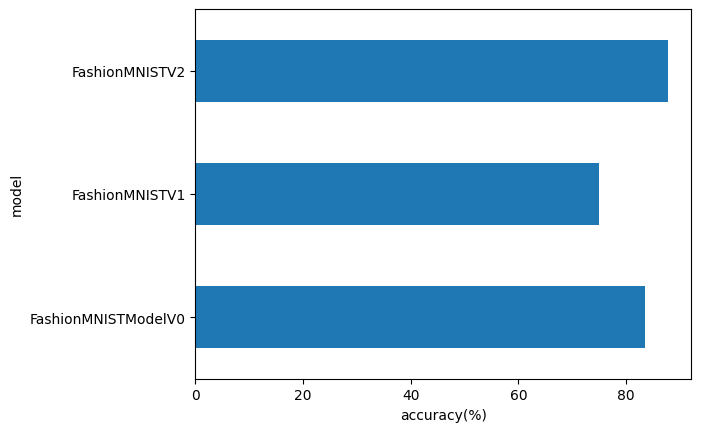

In [160]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy(%)")
plt.ylabel("model")

In [166]:
def make_predictions(model:nn.Module,
                    data:list,
                    device:torch.device=device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample,dim=0).to(device)
            
            pred_logits = model(sample)
            pred_prob = torch.softmax(pred_logits.squeeze(),dim=0)
            
            pred_probs.append(pred_prob.cpu())
            
    return torch.stack(pred_probs)

In [197]:
import random
# random.seed(42)
test_samples=[]
test_labels=[]

for sample,label in random.sample(list(test_data),k=9):
    test_samples.append(sample)
    test_labels.append(label)
    
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

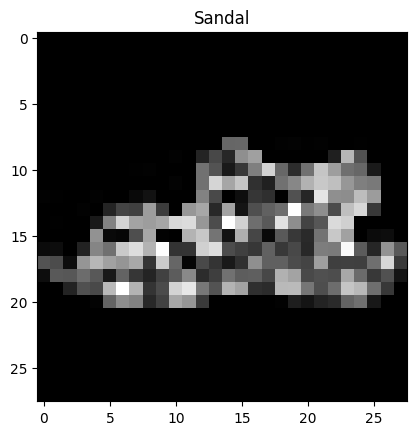

In [199]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])

In [200]:
pred_probs = make_predictions(model=model_2,
                             data=test_samples)

pred_probs[:2]

tensor([[2.0795e-05, 5.2246e-06, 6.3618e-06, 1.4909e-04, 1.6564e-04, 9.9843e-01,
         1.9743e-05, 7.1144e-04, 1.2731e-04, 3.6366e-04],
        [4.5858e-03, 3.5156e-06, 2.9224e-02, 5.6377e-04, 2.0967e-02, 2.2234e-06,
         9.4463e-01, 9.8971e-08, 2.3491e-05, 2.8907e-07]])

In [201]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 6, 6, 6, 3, 1, 2, 3, 6])

In [202]:
test_labels

[5, 6, 6, 4, 3, 1, 4, 6, 6]

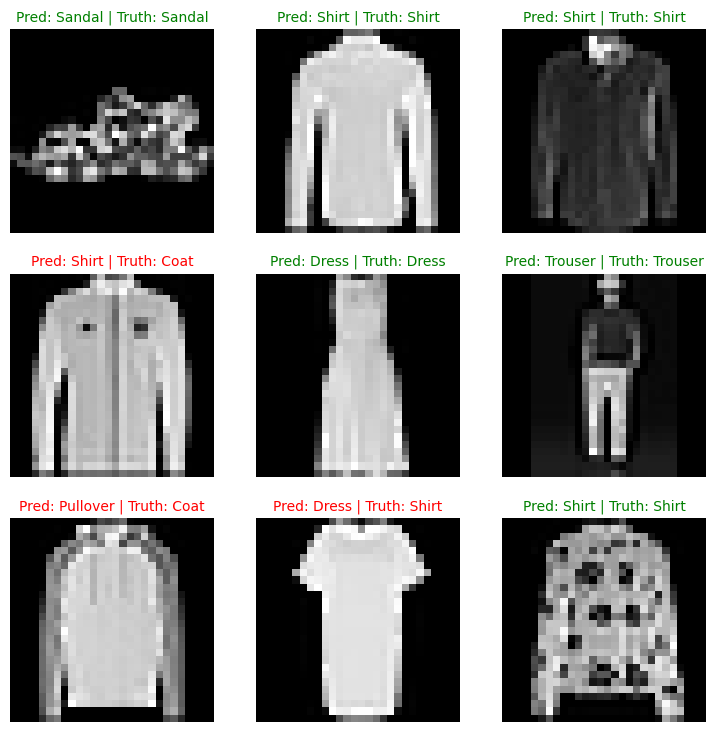

In [203]:
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i,sample in enumerate(test_samples):
    plt.subplot(nrows,ncols,i+1)
    
    plt.imshow(sample.squeeze(),cmap="gray")
    
    pred_label = class_names[pred_classes[i]]
    
    truth_label = class_names[test_labels[i]]
    
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"
    
    if pred_label == truth_label:
        plt.title(title_text,fontsize=10,c="g")
    else:
        plt.title(title_text,fontsize=10,c="r")
    plt.axis(False)

In [206]:
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X,y in tqdm(test_dataloader,desc="Making predictions..."):
        X,y=X.to(device),y.to(device)
        
        y_logit = model_2(X)
        
        y_pred = torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
        
        y_preds.append(y_pred.cpu())
        
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 8])

In [211]:
import torchmetrics
import mlxtend